# Following shows the steps of geting plots of data distrbution and statistical testing results

- before this step, you should group the comment dataset with sentiment and emotion labels by the author/author_id and then compute the percentage under each user

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
file_path = '/content/drive/MyDrive/Reddit/rematch_30_Nov/srdd_authors_rematch.csv'
srdd_authors = pd.read_csv(file_path, encoding='latin1')

file_path2 = '/content/drive/MyDrive/Reddit/rematch_30_Nov/control_authors_rematch.csv'
control_authors = pd.read_csv(file_path2, encoding='latin1')

Mounted at /content/drive


In [ ]:
# exclude users with comment count < 10
srdd_authors = srdd_authors[srdd_authors['total_count'] >= 10]
control_authors = control_authors[control_authors['total_count'] >= 10]


# Comment count distribution plot

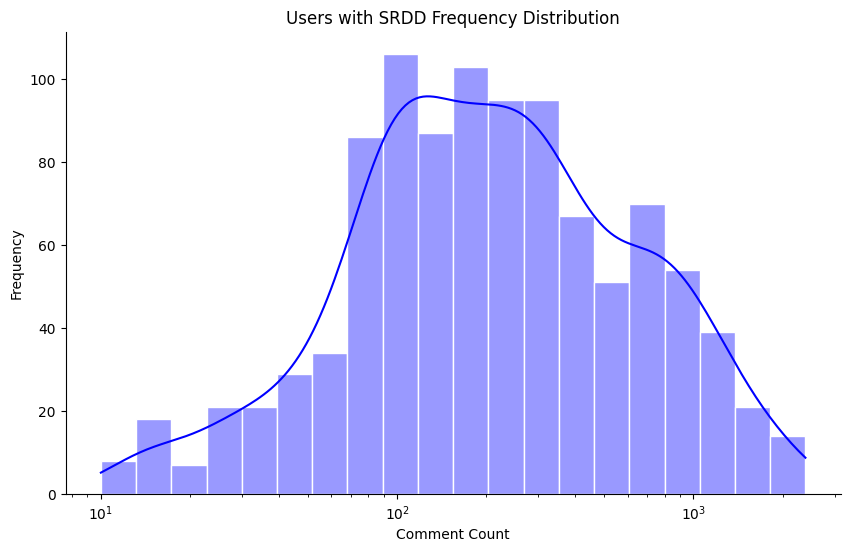

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path3 = '/content/drive/MyDrive/Reddit/rematch_30_Nov/srdd_comments_windowed_rematch.csv'
srdd_comments = pd.read_csv(file_path3, encoding='latin1',lineterminator='\n')
post_counts = srdd_comments.groupby('author').size()


plt.figure(figsize=(10, 6))
sns.histplot(post_counts, kde=True, bins=20, color='blue', edgecolor = 'white',alpha=0.4, log_scale =  True)
sns.despine()

plt.title('Users with SRDD Frequency Distribution')
plt.xlabel('Comment Count')
plt.ylabel('Frequency')
#plt.ylim(0, 400)
plt.show()

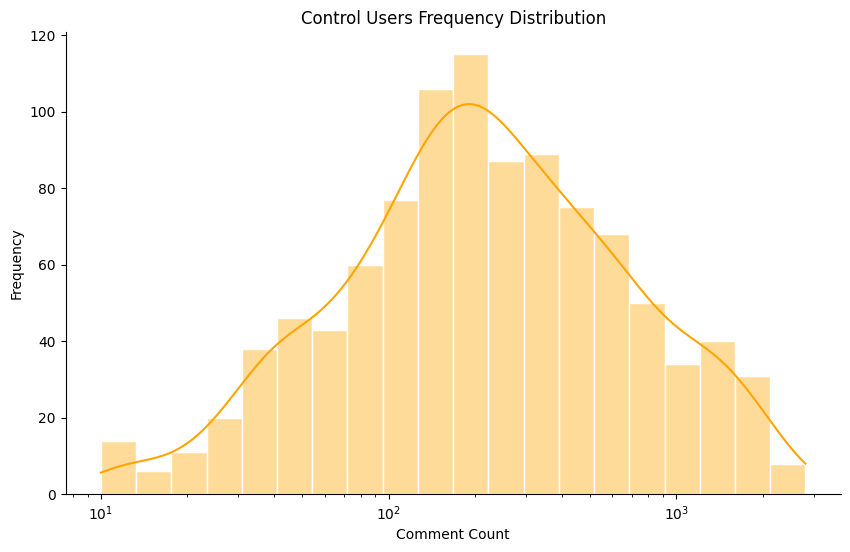

In [ ]:
file_path4 = '/content/drive/MyDrive/Reddit/rematch_30_Nov/control_comments_windowed_rematch.csv'
control_comments = pd.read_csv(file_path4, encoding='latin1',lineterminator='\n')
post_counts_control = control_comments.groupby('author_id\r').size()
post_counts_control = post_counts_control[post_counts_control>=10]

plt.figure(figsize=(10, 6))
sns.histplot(post_counts_control, kde=True, bins=20, color='orange', edgecolor = 'white',alpha=0.4, log_scale =  True)
sns.despine()

plt.title('Control Users Frequency Distribution')
plt.xlabel('Comment Count')
plt.ylabel('Frequency')
plt.show()

## **Plot based on labels**

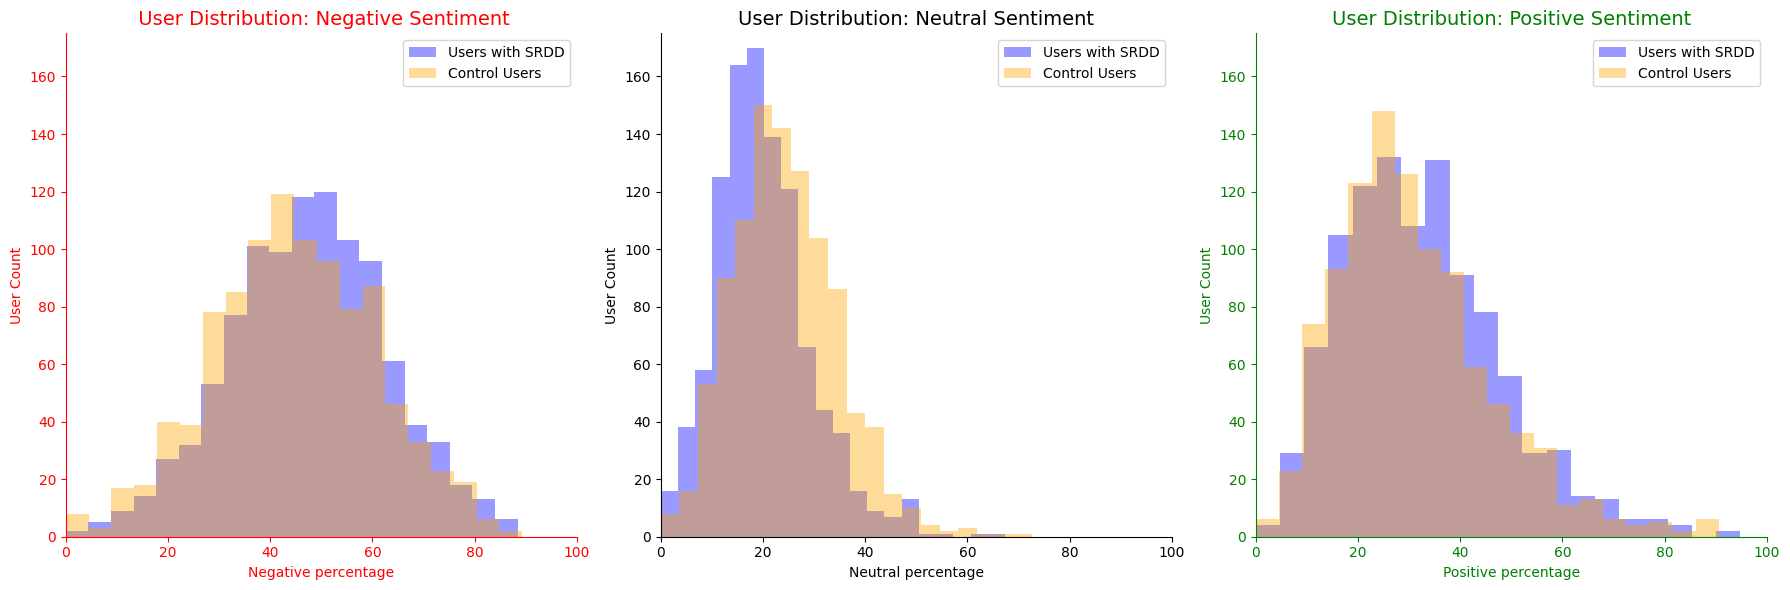

In [ ]:
import matplotlib.pyplot as plt

data1 = srdd_authors
data2 = control_authors

# sentiment and comment percentage
senti_columns = ['negative_percentage', 'neutral_percentage', 'positive_percentage']
senti_titles = [' User Distribution: Negative Sentiment', 'User Distribution: Neutral Sentiment', 'User Distribution: Positive Sentiment']
axis_colors = ['red', 'black', 'green']  # three colors representing three dfferent sentiments


fig, axes = plt.subplots(1, 3, figsize=(18, 6))
x_limits = (0, 100)
y_limits = (0, 175)

for i, (senti, title, axis_color) in enumerate(zip(senti_columns, senti_titles, axis_colors)):
    ax = axes[i]

    # plot srdd group
    ax.hist(data1[senti], bins=20, alpha=0.4, color='blue', label='Users with SRDD')
    # plot control group
    ax.hist(data2[senti], bins=20, alpha=0.4, color='orange', label='Control Users')


    #mean_data1 = data1[senti].mean()
    #ax.axvline(mean_data1, color='blue', linestyle='--',alpha=0.5, label=f'Mean (SRDD): {mean_data1:.2f}')

    #mean_data2 = data2[senti].mean()
    #ax.axvline(mean_data2, color='orange', linestyle='--',alpha=0.5, label=f'Mean (control): {mean_data2:.2f}')

    # axis color
    ax.spines['left'].set_color(axis_color)
    ax.spines['bottom'].set_color(axis_color)
    ax.tick_params(axis='x', colors=axis_color)
    ax.tick_params(axis='y', colors=axis_color)


    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlim(x_limits)
    ax.set_ylim(y_limits)

    ax.set_title(title, color=axis_color, fontsize=14)
    ax.set_xlabel(f'{senti.replace("_", " ").capitalize()}', color=axis_color)
    ax.set_ylabel('User Count', color=axis_color)
    ax.legend(loc='upper right')


plt.tight_layout()
plt.show()


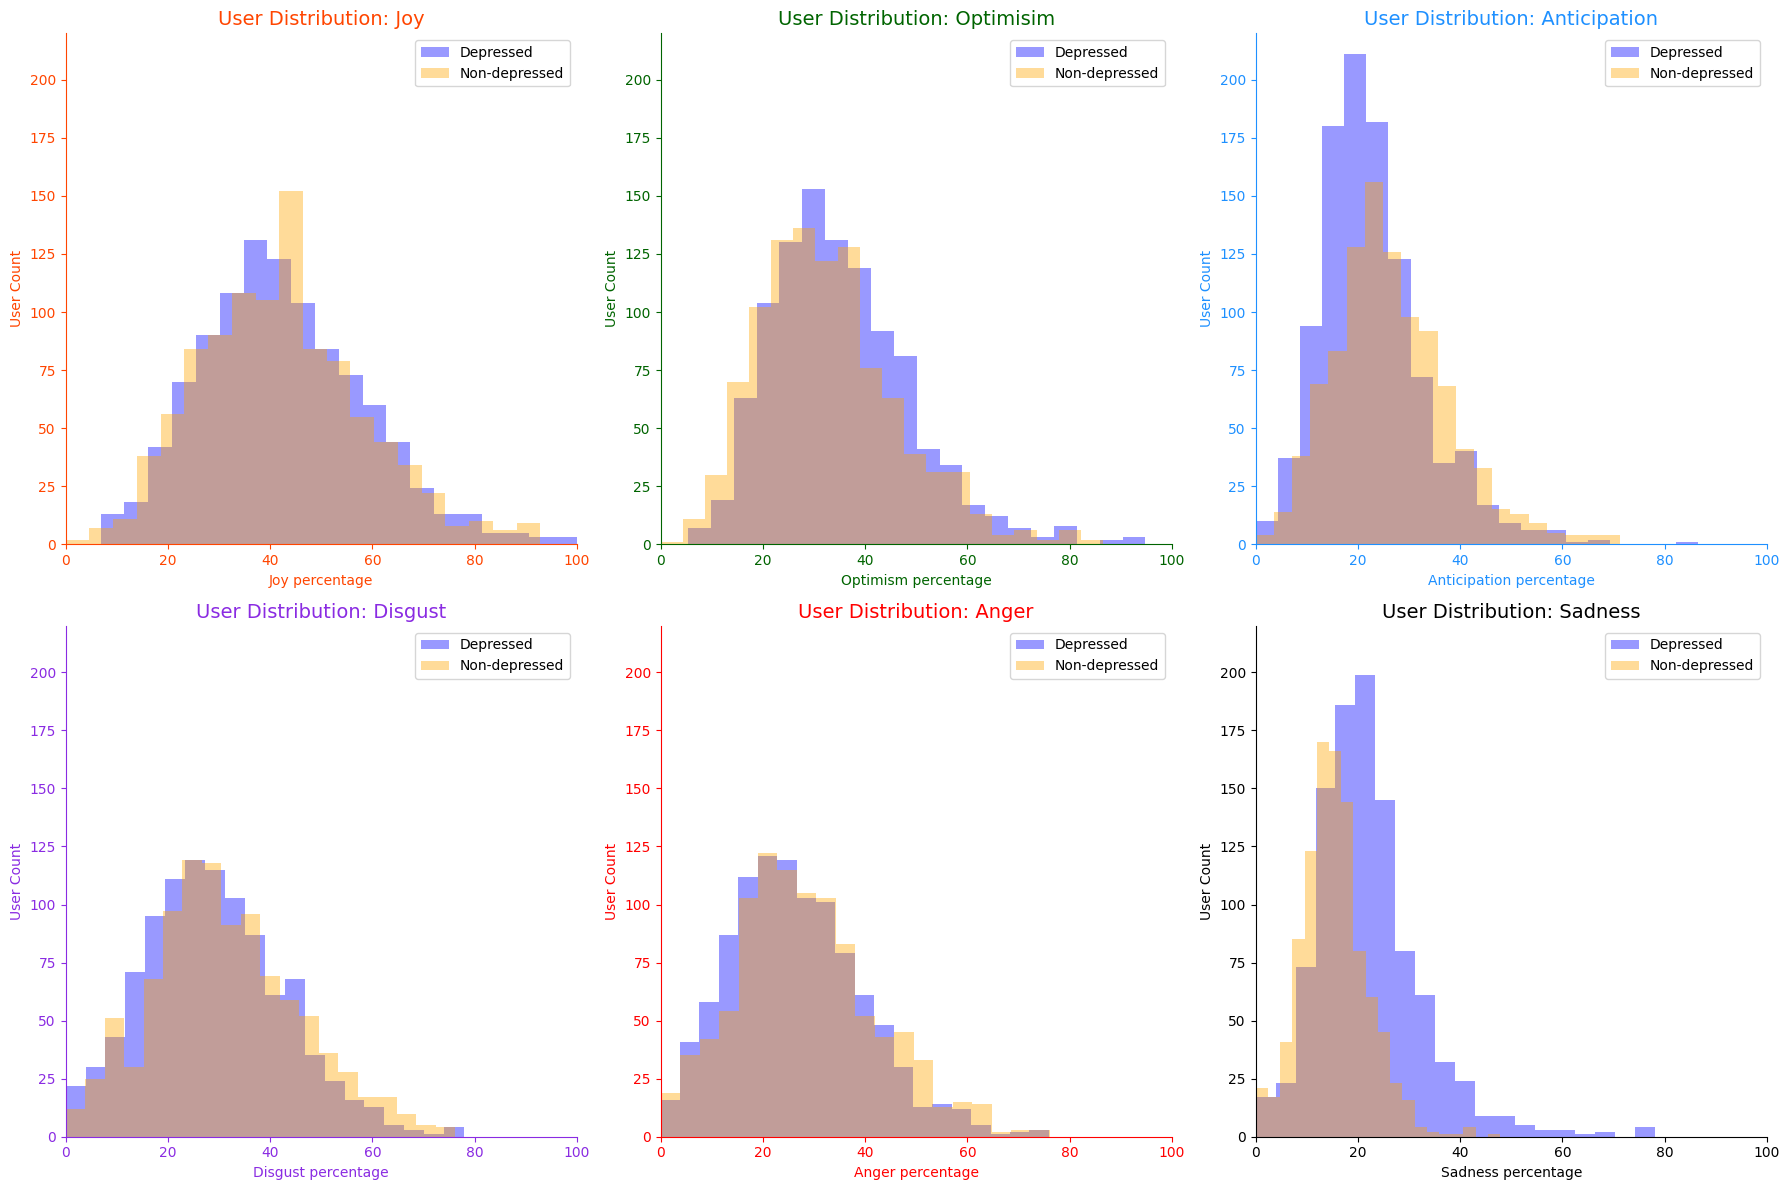

In [ ]:
# emotion and comment percentage
emotion_columns = ['joy_percentage', 'optimism_percentage', 'anticipation_percentage','disgust_percentage','anger_percentage','sadness_percentage']
emotion_titles = ['User Distribution: Joy', 'User Distribution: Optimisim', 'User Distribution: Anticipation','User Distribution: Disgust','User Distribution: Anger','User Distribution: Sadness']


axis_colors = ['#FF4500', 'darkgreen', '#1E90FF', '#8A2BE2', 'red', 'black']  # six axis colors


fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

x_limits = (0, 100)
y_limits = (0, 220)

for i, (emotion, title, axis_color) in enumerate(zip(emotion_columns, emotion_titles, axis_colors)):
    ax = axes[i]
    # plot for srdd group
    ax.hist(data1[emotion], bins=20, alpha=0.4, color='blue', label='Depressed')
    # plot for control group
    ax.hist(data2[emotion], bins=20, alpha=0.4, color='orange',  label='Non-depressed')

    # 设置坐标轴颜色
    ax.spines['left'].set_color(axis_color)
    ax.spines['bottom'].set_color(axis_color)
    ax.tick_params(axis='x', colors=axis_color)
    ax.tick_params(axis='y', colors=axis_color)

    # 移除右边和顶部的边框
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # 设置统一的坐标范围
    ax.set_xlim(x_limits)
    ax.set_ylim(y_limits)

    # 设置网格线，轻微灰色
    #ax.grid(True, linestyle='--', color='gray', alpha=0.3)

    # 设置图标题和加粗的坐标轴标签
    ax.set_title(title, color=axis_color,fontsize = 14)
    ax.set_xlabel(f'{emotion.replace("_", " ").capitalize()}', color=axis_color)
    ax.set_ylabel('User Count', color=axis_color)
    ax.legend(loc='upper right')

# 调整图形布局并显示
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

sentiment_columns = ['positive_percentage', 'neutral_percentage', 'negative_percentage']
sentiment_titles = ['Positive', 'Neutral', 'Negative']



# statistical testing
results = []

# t test
for sentiment, title in zip(sentiment_columns, sentiment_titles):
    data1_sentiment = data1[sentiment]
    data2_sentiment = data2[sentiment]

    stat, p_value = ttest_ind(data1_sentiment, data2_sentiment, equal_var=False)
    results.append({
        'Name': title,
        'Statistic': stat,
        'P-value': p_value,
        'Significant': p_value < 0.05  # p < 0.05 significance level
    })

results

[{'Name': 'Positive',
  'Statistic': 2.301341843249856,
  'P-value': 0.02147330904244416,
  'Significant': True},
 {'Name': 'Neutral',
  'Statistic': -9.96434508447204,
  'P-value': 7.364220863532542e-23,
  'Significant': True},
 {'Name': 'Negative',
  'Statistic': 3.997850049782155,
  'P-value': 6.621645030730181e-05,
  'Significant': True}]

In [ ]:
# mean and std error
sentiment_stats = {
    'Sentiment': [],
    'Depressed Mean': [],
    'Depressed Std Dev': [],
    'Non-depressed Mean': [],
    'Non-depressed Std Dev': []
}

for sentiment, title in zip(sentiment_columns, sentiment_titles):
    depressed_mean = data1[sentiment].mean()
    depressed_std = data1[sentiment].std()
    non_depressed_mean = data2[sentiment].mean()
    non_depressed_std = data2[sentiment].std()

    sentiment_stats['Sentiment'].append(title)
    sentiment_stats['Depressed Mean'].append(depressed_mean)
    sentiment_stats['Depressed Std Dev'].append(depressed_std)
    sentiment_stats['Non-depressed Mean'].append(non_depressed_mean)
    sentiment_stats['Non-depressed Std Dev'].append(non_depressed_std)

sentiment_stats_df = pd.DataFrame(sentiment_stats)
print(sentiment_stats_df)

  Sentiment  Depressed Mean  Depressed Std Dev  Non-depressed Mean  \
0  Positive       32.415432          15.303958           30.853994   
1   Neutral       20.165408           9.330875           24.500114   
2  Negative       47.419160          15.331893           44.645891   

   Non-depressed Std Dev  
0              15.264379  
1              10.237310  
2              15.909245  


In [ ]:
# t test for emotion results

emotion_map = {
    0: "anger",
    1: "anticipation",
    2: "disgust",
    3: "fear",
    4: "joy",
    5: "love",
    6: "optimism",
    7: "pessimism",
    8: "sadness",
    9: "surprise",
    10: "trust"
}

emotion_stats = {
    'Emotion': [],
    'Depressed Mean': [],
    'Depressed Std Dev': [],
    'Non-depressed Mean': [],
    'Non-depressed Std Dev': [],
    'T-Statistic': [],
    'P-value': [],
    'Significant': []
}

# t test
for _, emotion in emotion_map.items():
    column_name = f"{emotion}_percentage"

    data1_emotion = data1[column_name]
    data2_emotion = data2[column_name]

    depressed_mean = data1_emotion.mean()
    depressed_std = data1_emotion.std()
    non_depressed_mean = data2_emotion.mean()
    non_depressed_std = data2_emotion.std()

    t_stat, p_value = ttest_ind(data1_emotion, data2_emotion, equal_var=False)

    emotion_stats['Emotion'].append(emotion.capitalize())
    emotion_stats['Depressed Mean'].append(depressed_mean)
    emotion_stats['Depressed Std Dev'].append(depressed_std)
    emotion_stats['Non-depressed Mean'].append(non_depressed_mean)
    emotion_stats['Non-depressed Std Dev'].append(non_depressed_std)
    emotion_stats['T-Statistic'].append(t_stat)
    emotion_stats['P-value'].append(p_value)
    emotion_stats['Significant'].append(p_value < 0.05)  # p < 0.05 significance level

emotion_stats_df = pd.DataFrame(emotion_stats)
emotion_stats_df

,Emotion,Depressed Mean,Depressed Std Dev,Non-depressed Mean,Non-depressed Std Dev,T-Statistic,P-value,Significant
0,Anger,26.505875,13.025001,28.541853,13.905952,-3.402968,6.796319e-04,True
1,Anticipation,22.784170,10.312402,26.723721,11.388161,-8.164557,5.647738e-16,True
2,Disgust,29.026496,13.677427,31.439676,14.410928,-3.868255,1.130943e-04,True
3,Fear,8.410427,6.048742,4.996349,3.793293,15.269465,1.774723e-49,True
4,Joy,42.531271,15.895343,42.176939,16.029370,0.500014,6.171197e-01,False
5,Love,11.648188,8.986086,9.536040,9.067848,5.270468,1.505471e-07,True
6,Optimism,35.237614,13.655865,32.709380,13.579901,4.182267,3.009130e-05,True
7,Pessimism,5.571353,4.983839,3.224041,2.793691,13.125398,1.795287e-37,True
8,Sadness,22.074156,10.240553,15.398891,6.448044,17.613937,5.192186e-64,True
9,Surprise,2.457318,2.120886,3.023855,2.222159,-5.873931,4.965100e-09,True


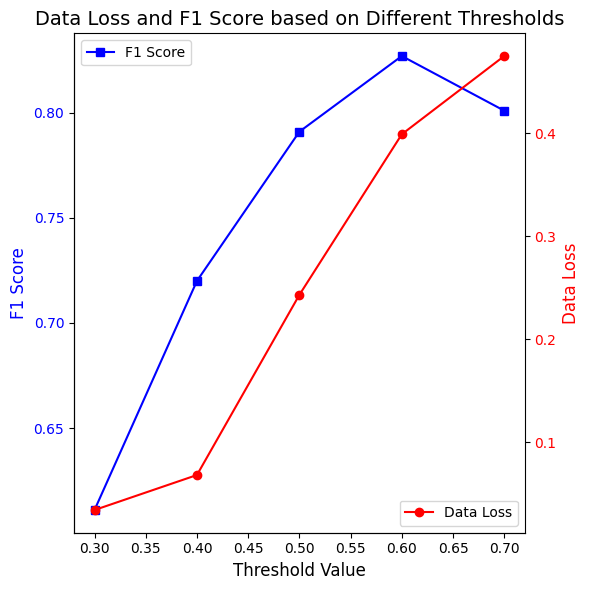

In [ ]:
import matplotlib.pyplot as plt

# calibration plot for sentiment results
# before this study, the annotation is done

thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]  # threshold
losses = [0.034, 0.068, 0.243, 0.399, 0.475]  # data loss
effects = [0.611, 0.72, 0.791, 0.827, 0.801]  # performance: F1-score

fig, ax1 = plt.subplots(figsize=(6, 6))

ax1.plot(thresholds, effects, label='F1 Score', color='blue', marker='s')
ax1.set_xlabel('Threshold Value', fontsize=12)
ax1.set_ylabel('F1 Score', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(thresholds, losses, label='Data Loss', color='red', marker='o')
ax2.set_ylabel('Data Loss', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

plt.title('Data Loss and F1 Score based on Different Thresholds', fontsize=14)

ax1.legend(loc='upper left')
ax2.legend(loc='lower right')

plt.tight_layout()
plt.show()
